In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# # Đọc hiển thị bức ảnh đầu vào
# image_path = str(input('Enter image file name (include image format): '))
# image = Image.open(image_path)
# plt.imshow(image)

# # Đọc các thông tin của bức ảnh đầu vào
# img = np.array(image)
# print('# of dims: ',img.ndim)     # dimension of an image
# print('Img shape: ',img.shape)    # shape of an image
# print('Dtype: ',img.dtype)

In [3]:
# 1.Thay đổi độ sáng cho ảnh (1 điểm) 

def changeBrightness(image_path, brightness):
    image = Image.open(image_path)
    A_list = np.array(image)
    #width, height, bit = np.shape(A_list)

    #thay độ sáng = cộng ma trận với 1 số 
    A_list = A_list + float(brightness)

    # khi một giá trị trong ma trận được cộng với brightness mà lớn hơn 255 thì sẽ được gán thành 255
    # khi một giá trị nhỏ hơn 0 thì sẽ được gán là 0
    A_list = np.clip(A_list, 0, 255)
    
    result = Image.fromarray(A_list.astype(np.uint8))
    
    return result

# brightness = 84
# image_path = str('summer.png')
# changeBrightness(image_path, brightness)

In [4]:
# 2. Thay đổi độ tương phản (1 điểm)
def changeContrast(image_path, contrast):
    #image_path = str('summer.png')
    image = Image.open(image_path)
    B_list = np.array(image)
    #width, height, bit = np.shape(B_list)

    #thay độ sáng = cộng ma trận với 1 số 
    B_list = B_list * float(contrast)

    # khi một giá trị trong ma trận được cộng với brightness mà lớn hơn 255 thì sẽ được gán thành 255
    # khi một giá trị nhỏ hơn 0 thì sẽ được gán là 0
    B_list = np.clip(B_list, 0, 255)
    
    result = Image.fromarray(B_list.astype(np.uint8))
    return result  

# brightness = 1.5
# changeContrast(brightness)

In [5]:
# 3. Lật ảnh (ngang - dọc) (2 điểm)

# lật dọc bức ảnh
def rotateImageHorizontal(image):
    img = np.array(image)
    img_temp = img.copy()
    width = img_temp.shape[0]
    
    for i in range(width // 2):
        c = img_temp[i, :, :].copy()
        img_temp[i, :, :] = img_temp[width - i - 1, :, :] # : lấy hết các phần tử trong ma trận
        img_temp[width - i - 1, :, :] = c

    result = Image.fromarray(img_temp.astype(np.uint8))
    return result
         
# image_path = 'summer.png'
# img = np.array(Image.open(image_path))
# rotateImageHorizontal(img)

In [6]:
# lật ngang tấm ảnh
def rotateImageVertical(image): 
    img = np.array(image)
    img_temp = img.copy()
    height = img_temp.shape[1]
    
    for i in range(height // 2):
        c = img_temp[:, i, :].copy()
        img_temp[:, i, :] = img_temp[:, height - i - 1, :]
        img_temp[:, height - i - 1, :] = c

    result = Image.fromarray(img_temp.astype(np.uint8))
    return result

# image_path = 'summer.png'
# img = np.array(Image.open(image_path))
# rotateImageVertical(img)

In [7]:
# 4.Chuyển đổi ảnh RGB thành ảnh xám (2 điểm) 

def to_grayscale(image):         
    weights = np.c_[0.3, 0.59 , 0.11]
                    #red  green  blue
    tile = np.tile(weights, reps = (image.shape[0], image.shape[1], 1))
    return np.sum(tile * image, axis = 2)

def RGB2Greyscale(image):
    RGB_list = np.array(image)
    #width, height, bit = np.shape(C_list)
    
    Gray_list = to_grayscale(RGB_list)
    result = Image.fromarray(Gray_list.astype(np.uint8))
    
    return result

In [8]:
# 5. Chồng 2 ảnh cùng kích thước (1 điểm): chỉ làm trên ảnh xám

def stack2Image(iamge_path_1, iamge_path_2):
    # chồng 2 ảnh cùng kích thước, nếu 2 ảnh không cùng thì ảnh này sẽ được resize lại như ảnh kia
    img1 = np.array(Image.open(iamge_path_1))
    img2 = np.array(Image.open(iamge_path_2).resize(img1.shape[1::-1])) #để resize lại ảnh cần 2 yêu tố: chiều dài và chiều rộng

    img1_gray = to_grayscale(img1)
    img2_gray = to_grayscale(img2)
    # bắt đầu thực hiện việc chồng 2 ảnh vào nhau
    F_list = (img1_gray * 0.6 + img2_gray * 0.4) 
    
    result = Image.fromarray(F_list.astype(np.uint8))
    return result

# iamge_path_1 = 'summer.png'
# iamge_path_2 = 'winter.jpg'
# result = stack2Image(iamge_path_1, iamge_path_2)
# plt.imshow(result,  cmap = 'Greys')

In [9]:
# 6. Làm mờ ảnh (2 điểm)

def blurImage(image_path):
    image = Image.open(image_path)
    G_list = np.array(image)
    
    width, height, bit = np.shape(G_list)
    
    Gaussian = np.array([[[1], [2], [1]],
                       [[2], [4], [2]],
                       [[1], [2], [1]]]) / 16
    
#     Gaussian = np.array([[[1], [4], [6], [4], [1]],
#                          [[4], [16], [24], [16], [4]],
#                          [[6], [24], [36], [24], [6]],
#                          [[4], [16], [24], [16], [4]],
#                          [[1], [4], [6], [4], [1]]]) / 256
    
    temp = np.zeros((width + 2, height + 2, bit))
    temp[1:-1,1:-1,:] = G_list
    
    for a in range(0, width):
        for b in range(0, height):
            G_list[a][b] = (temp[a:a+3, b:b+3] * Gaussian).sum(axis=1).sum(axis=0)

    
    result = Image.fromarray(G_list.astype(np.uint8))
    
    return result

    
# image_path = 'spring.jpg'
# result = blurImage(image_path)
# plt.imshow(result)

In [10]:
#8.Thực hiện việc cắt nội dung ảnh theo khung được áp lên, với khung là hình như hình tròn

def crop_img_by_circle_frame(image_path):
    img = np.array(Image.open(image_path))
    
    width, height, bit = np.shape(img)

    R = 5 #bán kính của hình tròn
    if width > height:
        R = height/2
    else:
        R = width/2

    for a in range(width):
        for b in range(height):
            if (a - width/2)*(a - width/2) + (b - height/2)*(b - height/2) > R*R:
                img[a][b] = 0 #điểm ảnh màu đen

    result = Image.fromarray(img.astype(np.uint8))
    return result

In [ ]:
#9.Thực hiện việc cắt nội dung ảnh theo khung được áp lên, với khung là 2 hình elip

def crop_img_by_elip_frame(image_path):
    img = np.array(Image.open(image_path))
    
    width, height, bit = np.shape(img)


    for a in range(width):
        for b in range(height):
            if (a - width/2)*(a - width/2) + (b - height/2)*(b - height/2) > R*R:
                img[a][b] = 0 #điểm ảnh màu đen

    result = Image.fromarray(img.astype(np.uint8))
    return result

In [11]:
# 7.Viết hàm main xử lý (1 điểm)
class Operate:
    # Menu for users   
    # chương trình 'main' cho phép người dùng nhập vào tên tập tin ảnh mỗi lần chương trình thực thi
    
    def out_sentence(self, img_res):
        print('\nOutput:\n', 'Image saved successfully!\n',' -Image\'s name saved as ' + str(img_res))
    
    def save_changeBrightness(self, image_path, result):
        img_res = image_path.split('.')[0] + "_changeBrightness.png"
        result.save(img_res)
        self.out_sentence(img_res)
        
    def save_changeContrast(self, image_path, result):
        img_res = image_path.split('.')[0] + "_changeContrast.png"
        result.save(img_res)
        self.out_sentence(img_res)
    
    def save_horizonImage(self, image_path, result):
        img_res = image_path.split('.')[0] + "_horizonImage.png"
        result.save(str(img_res))
        self.out_sentence(img_res)
        
    def save_verticImage(self, image_path, result):
        img_res = image_path.split('.')[0] + "_verticImage.png"
        result.save(img_res)
        self.out_sentence(img_res)
        
    def save_grayImage(self, image_path, result):
        img_res = image_path.split('.')[0] + "_grayImage.png"
        result.save(img_res)
        self.out_sentence(img_res)
        
    def save_stack2Image(self, image_path, result):
        img_res = image_path.split('.')[0] + "_stack2Image.png"
        result.save(img_res)
        self.out_sentence(img_res)
        
    def save_blurImage(self, image_path, result):
        img_res = image_path.split('.')[0] + "_blurImage.png"
        result.save(img_res)
        self.out_sentence(img_res)
        
    def save_circleFrameCut(self, image_path, result):
        img_res = image_path.split('.')[0] + "_circleFrameCut.png"
        result.save(img_res)
        self.out_sentence(img_res)
        

    def main(self):

        # Đọc hiển thị bức ảnh đầu vào
        image_path = str(input('Enter image file name (include image format): '))
        image = Image.open(image_path)
        
        # hiển thị thông tin ảnh
        print('\nInput:\n', '-Image file name: ' + image_path + '\n')
        
        # main menu
        print("1.Change image brightness")
        print("2.Change image contrast")
        print("3.Flip photos horizontally or vertically")
        print("4.Convert RGB image to grayscale image")
        print("5.Stack 2 images of the same size")
        print("6.Blur image")
        print("7.Crop image according to the circle frame")
        print("0.Option to perform all functions from 1 to 7\n")
        
 
        out = int(input(' Choose an image processing function (from 1 to 7) or 0 for excuting all six functions: '))
        while out < 0 or out > 7:
            out = int(input(' Error! Please choose again: '))

        if out == 1:
            brigthness = float(input(' Enter image brigthness: '))
            result = changeBrightness(image_path, brigthness)
            
            fig = plt.figure(figsize = (20, 20))
    
            # in ra ảnh gốc
            fig.add_subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Original image")

            # in ra ảnh sau khi được tăng độ sáng
            fig.add_subplot(1, 2, 2)
            plt.imshow(result)
            plt.title("Changed Brightness image")
            
            # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
            self.save_changeBrightness(image_path, result)
        
        if out == 2:
            contrast = float(input(' Enter image contrast: '))
            result = changeContrast(image_path, contrast)
            
            fig = plt.figure(figsize = (20, 20))
    
            # in ra ảnh gốc
            fig.add_subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Original image")

            # in ra ảnh sau khi được tăng độ tương phản
            fig.add_subplot(1, 2, 2)
            plt.imshow(result)
            plt.title("Changed Contrast image")
            
            # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
            self.save_changeContrast(image_path, result)
            
        if out == 3:
            choose = int(input(' Flip the image horizontally (1) or vertically (2): '))
            while choose < 1 or choose > 2:
                choose = int(input(' Error! Please choose again: '))
            if choose == 1:
                fig = plt.figure(figsize=(20, 20))

                # in ra ảnh gốc
                fig.add_subplot(1, 2, 1)
                plt.imshow(image)
                plt.title("Original image")
                
                # in ra ảnh sau khi được lật dọc
                fig.add_subplot(1, 2, 2)
                result = rotateImageHorizontal(image)
                plt.imshow(result)
                plt.title("Rotated image by horizontal 1")
                
                # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
                self.save_horizonImage(image_path, result)
            if choose == 2:
                fig = plt.figure(figsize=(20, 20))

                # in ra ảnh gốc
                fig.add_subplot(1, 2, 1)
                plt.imshow(image)
                plt.title("Original image")

                # in ra ảnh sau khi được lật ngang
                # sử dụng thư viện có sẵn trong Numpy
                fig.add_subplot(1, 2, 2)
                result = rotateImageVertical(image)
                plt.imshow(result)
                plt.title("Rotated image by vertical")
                
                # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
                self.save_verticImage(image_path, result)
        if out == 4:
            fig = plt.figure(figsize=(20, 20))
    
            # in ra ảnh gốc
            fig.add_subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Original image")

            # in ra ảnh sau khi được chuyển đổi từ ảnh RGB thành ảnh xám
            fig.add_subplot(1, 2, 2)
            result = RGB2Greyscale(image)
            plt.imshow(result, cmap = 'Greys')
            plt.title("RGB to Greyscale image")
            
            # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
            self.save_grayImage(image_path, result)
             
        if out == 5:
            image_path_2 = str(input(' Enter the second image file name (include image format): '))
            fig = plt.figure(figsize=(15, 15))
            
            # in ra ảnh gốc
            fig.add_subplot(1, 3, 1)
            plt.imshow(image)
            plt.title("Original image 1")
            
            # in ra ảnh gốc 2
            image_2 = Image.open(image_path_2)
            fig.add_subplot(1, 3, 2)
            plt.imshow(image_2)
            plt.title("Original image 2")
            
            fig.add_subplot(1, 3, 3)
            result = stack2Image(image_path, image_path_2)
            plt.imshow(result, cmap = 'Greys')
            plt.title("Stack 2 images together")
            
            # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
            self.save_stack2Image(image_path, result)
            
        if out == 6:
            fig = plt.figure(figsize=(20, 20))
            
            # in ra ảnh gốc
            fig.add_subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Original image")

            # in ra ảnh sau khi được làm mờ
            fig.add_subplot(1, 2, 2)
            result = blurImage(image_path)
            plt.imshow(result)
            plt.title("Blurred image")
            
            # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
            self.save_blurImage(image_path, result)
            
        if out == 7:
            fig = plt.figure(figsize=(20, 20))
            
            # in ra ảnh gốc
            fig.add_subplot(1, 2, 1)
            plt.imshow(image)
            plt.title("Original image")
            
            #in ra ảnh sau khi được cắt nội dung theo khung được áp lên, với khung là hình như hình tròn
            fig.add_subplot(1, 2, 2)
            result = crop_img_by_circle_frame(image_path)
            plt.imshow(result)
            plt.title("Crop image by a circle frame")
            
            # lưu ảnh ứng với tên ảnh ban đầu_tên chức năng thực hiện.png
            self.save_circleFrameCut(image_path, result)
            
        if out == 0:
            print('1. In ra ảnh được thay đổi độ sáng') 
            
            brigthness = float(input(' Enter image brigthness: '))
            
            result = changeBrightness(image_path, brigthness)
            
            # show image to console
            # setup cho khung ảnh khi in ra console các hình ảnh sau khi được xử lí
            fig = plt.figure(figsize = (20, 20))
            fig.add_subplot(5, 5, 1)
            plt.imshow(image)
            plt.title("Changed Brightness image")
            
            # save image
            self.save_changeBrightness(image_path, result)
            
            print('2. In ra ảnh được thay đổi độ tương phản')
            fig.add_subplot(5, 5, 2)
            contrast = float(input(' Enter image contrast: '))
            result = changeContrast(image_path, contrast)
            
            plt.imshow(result)
            plt.title("Changed Contrast image")
            
            # lưu ảnh
            self.save_changeContrast(image_path, result)
            
            print('3: Lật ảnh (ngang - dọc)')
            # in ra ảnh sau khi được lật dọc
            fig.add_subplot(5, 5, 3)
            result = rotateImageHorizontal(image)
            plt.imshow(result)
            plt.title("Rotated image by horizontal")
            
            # lưu ảnh
            self.save_horizonImage(image_path, result)

            #in ra ảnh sau khi được lật ngang
            fig.add_subplot(5, 5, 4)
            result = rotateImageVertical(image)
            plt.imshow(result)
            plt.title("Rotated image by vertical")
            
            # lưu ảnh
            self.save_verticImage(image_path, result)
            
            print('4: Chuyển đổi ảnh RGB thành ảnh xám')
            # in ra ảnh sau khi được chuyển đổi từ ảnh RGB thành ảnh xám
            fig.add_subplot(5, 5, 5)
            result = RGB2Greyscale(image)
            plt.imshow(result, cmap = 'Greys')
            plt.title("RGB to Greyscale image")
            
            # lưu ảnh
            self.save_grayImage(image_path, result)
            
            print('5: Chồng 2 ảnh cùng kích thước (1 điểm): chỉ làm trên ảnh xám')
            image_path_2 = str(input(' Enter the second image file name (include image format): '))
            stack2Image(image_path, image_path_2)
            
            fig.add_subplot(5, 5, 6)
            result = stack2Image(image_path, image_path_2)
            plt.imshow(result, cmap = 'Greys')
            plt.title("Stack 2 images together")
            
            # lưu ảnh
            self.save_stack2Image(image_path, result)
            
            print('6: Làm mờ ảnh')
            # in ra ảnh sau khi được làm mờ
            fig.add_subplot(5, 5, 7)
            result = blurImage(image_path)
            plt.imshow(result)
            plt.title("Blurred image")
            
            # lưu ảnh
            self.save_blurImage(image_path, result)
            
            print('\n7: Cắt nội dung ảnh theo khung được áp lên, với khung là hình như hình tròn')
            # in ra ảnh sau khi được cắt theo khung hình tròn
            fig.add_subplot(5, 5, 8)
            result = crop_img_by_circle_frame(image_path)
            plt.imshow(result)
            plt.title("Crop image by a circle frame")
            
            # lưu ảnh
            self.save_circleFrameCut(image_path, result)
            

Enter image file name (include image format): winter.jpg

Input:
 -Image file name: winter.jpg

1.Change image brightness
2.Change image contrast
3.Flip photos horizontally or vertically
4.Convert RGB image to grayscale image
5.Stack 2 images of the same size
6.Blur image
7.Crop image according to the circle frame
0.Option to perform all functions from 1 to 7

 Choose an image processing function (from 1 to 7) or 0 for excuting all six functions: 0
1. In ra ảnh được thay đổi độ sáng
 Enter image brigthness: 39

Output:
 Image saved successfully!
  -Image's name saved as winter_changeBrightness.png
2. In ra ảnh được thay đổi độ tương phản
 Enter image contrast: 1.564

Output:
 Image saved successfully!
  -Image's name saved as winter_changeContrast.png
3: Lật ảnh (ngang - dọc)

Output:
 Image saved successfully!
  -Image's name saved as winter_horizonImage.png

Output:
 Image saved successfully!
  -Image's name saved as winter_verticImage.png
4: Chuyển đổi ảnh RGB thành ảnh xám

Output:

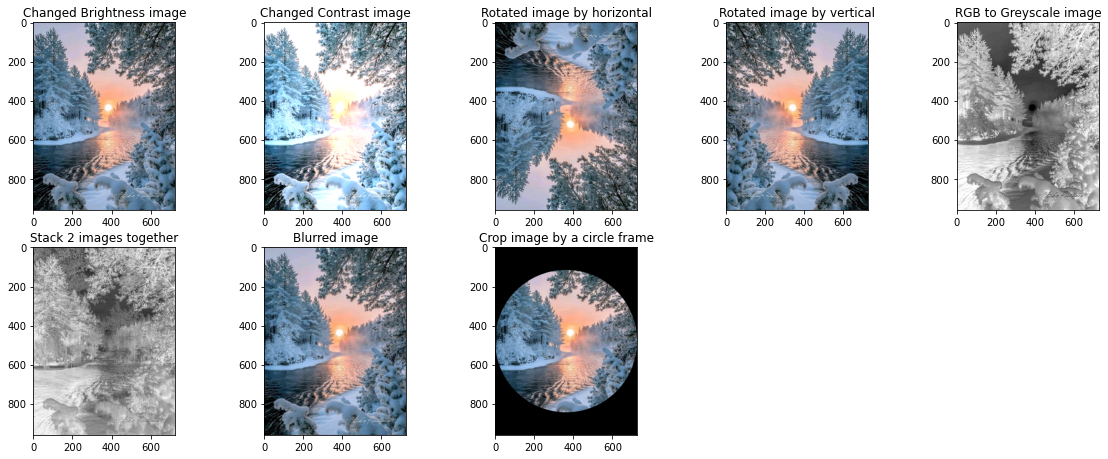

In [21]:
start_program = Operate()
start_program.main()

#spring.jpg
#summer.png
#autumn.jpg
#winter.jpg